In [22]:
import pandas as pd
import pyreadstat
import pygwalker as pyg

df, meta = pyreadstat.read_xport('06191-0001-Data.xpt')

In [23]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61
0,67.0,1.0,9.0,9.0,9999999999,VVWIIK779274,AK,001,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
1,25.0,9.0,9.0,9.0,9999999999,UCQRBF359793,AK,001,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
2,40.0,9.0,9.0,9.0,9999999999,HTHMWC509187,AK,001,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
3,27.0,9.0,9.0,9.0,9999999999,XJLXLX379698,AK,AST,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
4,25.0,9.0,9.0,9.0,9999999999,SQXRBF358795,AK,999,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736841,59.0,2.0,9.0,9.0,9999999999,100000040643,VT,VSP,,1989.0,...,116.0,9.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
736842,28.0,1.0,9.0,9.0,9999999999,100000011009,VT,999,,1990.0,...,99999.0,4.0,0.0,0.0,15.0,0.0,0.0,30.0,3.0,1990.0
736843,20.0,1.0,9.0,9.0,9999999999,100000041557,VT,014,,1989.0,...,195.0,14.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0
736844,43.0,1.0,9.0,9.0,9999999999,100000040435,VT,014,,1990.0,...,99999.0,88.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0


# Missing values (substituting)

In [29]:
# set values in columns 18 through 61 to NA where V17 does not equal '8'
df.loc[df['V17'].isin([1, 2, 3, 4, 5, 9]), df.columns[17:]] = pd.NA


# set values in columns 28 through 61 to NA where V27 equals 4, 5, 7, 8, or 9
df.loc[df['V27'].isin([4, 5, 7, 8, 9]), df.columns[27:]] = pd.NA

In [62]:
# check
df[df['V17'] == 3]['V7']

31528     CA
31555     CA
31718     CA
31769     CA
31818     CA
          ..
314862    MO
315097    MO
315156    MO
315206    MO
315207    MO
Name: V7, Length: 20487, dtype: object

# NA & counties

In [37]:
# creating true county name and deleting duplicates
df['county_true'] = df['V7'].str.cat(df['V8'], sep='_')

In [42]:
# get unique values of county_true
unique_categories = df['county_true'].unique()

# create a dictionary to store subsets of the data
dt_dict = {}

# loop through unique categories and create a subset for each one
for category in unique_categories:
    subset_name = f'dt_{category}' 
    dt_dict[subset_name] = df[df['county_true'] == category]

# print summary of the 'dt_001' subset
print(dt_dict['dt_AK_001'].describe())

                V1           V2           V3      V4          V10  \
count  1737.000000  1737.000000  1737.000000  1737.0  1737.000000   
mean     30.143926     8.294761     8.780081     9.0  1989.315486   
std      11.201702     2.241096     1.283085     0.0     1.135699   
min      11.000000     1.000000     1.000000     9.0  1984.000000   
25%      22.000000     9.000000     9.000000     9.0  1989.000000   
50%      28.000000     9.000000     9.000000     9.0  1990.000000   
75%      35.000000     9.000000     9.000000     9.0  1990.000000   
max      99.000000     9.000000     9.000000     9.0  1990.000000   

               V11  V12          V13          V14          V15     V16     V17  
count  1737.000000  0.0  1737.000000  1737.000000  1737.000000  1737.0  1737.0  
mean      6.317789  NaN     1.873921    51.833621  2410.392631     1.0     8.0  
std       3.458825  NaN     1.792745    48.979781  1359.256934     0.0     0.0  
min       1.000000  NaN     1.000000     1.000000   99

### Mean value of NA in each column

In [43]:
# get unique values of V8
unique_categories = df['county_true'].unique()

# loop through unique categories and create a dictionary to store the mean percentage of missing values
mean_missing_dict = {}
for category in unique_categories:
    # create a subset for the category
    subset_name = f'dt_{category}' 
    subset = df[df['county_true'] == category]

    # count percentage of missing values for each column in the subset
    missing_percentages = subset.isna().mean() * 100

    # calculate the mean percentage of missing values across all columns for the subset
    mean_missing = missing_percentages.mean()

    # add the mean percentage of missing values to the dictionary
    mean_missing_dict[subset_name] = mean_missing

# print the mean percentage of missing values for each subset
for subset_name, mean_missing in mean_missing_dict.items():
    print(f'{subset_name}: {mean_missing}')

dt_AK_001: 27.293071108882554
dt_AK_AST: 29.664516129032275
dt_AK_999: 27.240143369175648
dt_AK_DI0: 28.06451612903226
dt_AK_BND: 26.81451612903226
dt_AL_SS3: 8.064516129032258
dt_AL_003: 8.064516129032258
dt_AL_001: 8.064516129032258
dt_AL_002: 8.064516129032258
dt_AL_047: 8.064516129032258
dt_AL_052: 8.064516129032258
dt_AL_022: 8.064516129032258
dt_AL_059: 8.064516129032258
dt_AL_046: 8.064516129032258
dt_AL_014: 8.064516129032258
dt_AL_012: 8.064516129032258
dt_AL_041: 8.064516129032258
dt_AL_029: 8.064516129032258
dt_AL_005: 8.064516129032258
dt_AL_067: 8.064516129032258
dt_AL_064: 8.064516129032258
dt_AL_034: 8.064516129032258
dt_AL_023: 8.064516129032258
dt_AL_042: 8.064516129032258
dt_AL_057: 8.064516129032258
dt_AL_038: 8.064516129032258
dt_AL_039: 8.064516129032258
dt_AL_013: 8.064516129032258
dt_AL_063: 8.064516129032258
dt_AL_004: 8.064516129032258
dt_AL_011: 8.064516129032258
dt_AL_031: 8.064516129032258
dt_AL_027: 8.064516129032258
dt_AL_061: 8.064516129032258
dt_AL_008: 

# NA & states

In [44]:
# get unique values of V7
unique_categories = df['V7'].unique()

# create a dictionary to store subsets of the data
dt_dict = {}

# loop through unique categories and create a subset for each one
for category in unique_categories:
    subset_name = f'dt_{category}' 
    dt_dict[subset_name] = df[df['V7'] == category]

# print summary of the 'dt_001' subset
print(dt_dict['dt_AK'].describe())

                V1           V2           V3      V4          V10  \
count  3649.000000  3649.000000  3649.000000  3649.0  3649.000000   
mean     30.367224     8.456837     8.842971     9.0  1989.389696   
std      11.407306     1.988829     1.088847     0.0     1.057276   
min      11.000000     1.000000     1.000000     9.0  1984.000000   
25%      22.000000     9.000000     9.000000     9.0  1989.000000   
50%      28.000000     9.000000     9.000000     9.0  1990.000000   
75%      36.000000     9.000000     9.000000     9.0  1990.000000   
max      99.000000     9.000000     9.000000     9.0  1990.000000   

               V11  V12          V13          V14          V15     V16     V17  
count  3649.000000  0.0  3649.000000  3649.000000  3649.000000  3649.0  3649.0  
mean      6.366950  NaN     1.877227    51.571115  2459.988764     1.0     8.0  
std       3.388806  NaN     1.771252    48.981518  1390.290670     0.0     0.0  
min       1.000000  NaN     1.000000     1.000000   99

### Mean value of NA in each column

In [45]:
# get unique values of V7
unique_categories = df['V7'].unique()

# loop through unique categories and create a dictionary to store the mean percentage of missing values
mean_missing_dict = {}
for category in unique_categories:
    # create a subset for the category
    subset_name = f'dt_{category}' 
    subset = df[df['V7'] == category]

    # count percentage of missing values for each column in the subset
    missing_percentages = subset.isna().mean() * 100

    # calculate the mean percentage of missing values across all columns for the subset
    mean_missing = missing_percentages.mean()

    # add the mean percentage of missing values to the dictionary
    mean_missing_dict[subset_name] = mean_missing

# print the mean percentage of missing values for each subset
for subset_name, mean_missing in mean_missing_dict.items():
    print(f'{subset_name}: {mean_missing}')

dt_AK: 27.7685446299914
dt_AL: 8.064516129032258
dt_CA: 18.623498556523273
dt_ID: 8.107545388929
dt_MN: 16.221667858317097
dt_MO: 41.30816104368828
dt_NB: 8.064516129032258
dt_NJ: 13.173238546941757
dt_NY: 9.658484924952388
dt_PA: 21.88409114391336
dt_VA: 8.064516129032258
dt_VT: 19.66287678476995


In [46]:
df.to_csv('obts.csv')

# Bar charts for police/prosecution/court dispositions variables

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://www.dropbox.com/s/on8q6tly815ovzg/obts_new.csv?dl=1')
data

/var/folders/p9/d79c5zx13b377v_v34ldc8zh0000gn/T/ipykernel_44723/2179107250.py:4: DtypeWarning: Columns (6,8,22,32,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://www.dropbox.com/s/on8q6tly815ovzg/obts_new.csv?dl=1')


,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V53,V54,V55,V56,V57,V58,V59,V60,V61,county_true
0,0,67.0,1.0,9.0,9.0,9999999999,VVWIIK779274,AK,001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK_001
1,1,25.0,9.0,9.0,9.0,9999999999,UCQRBF359793,AK,001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK_001
2,2,40.0,9.0,9.0,9.0,9999999999,HTHMWC509187,AK,001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK_001
3,3,27.0,9.0,9.0,9.0,9999999999,XJLXLX379698,AK,AST,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK_AST
4,4,25.0,9.0,9.0,9.0,9999999999,SQXRBF358795,AK,999,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AK_999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736841,736841,59.0,2.0,9.0,9.0,9999999999,100000040643,VT,VSP,NaN,...,9.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0,VT_VSP
736842,736842,28.0,1.0,9.0,9.0,9999999999,100000011009,VT,999,NaN,...,4.0,0.0,0.0,15.0,0.0,0.0,30.0,3.0,1990.0,VT_999
736843,736843,20.0,1.0,9.0,9.0,9999999999,100000041557,VT,014,NaN,...,14.0,888.0,88.0,888.0,888.0,88.0,888.0,8.0,1990.0,VT_014
736844,736844,43.0,1.0,9.0,9.0,9999999999,100000040435,VT,014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VT_014


In [6]:
data_copy = data.copy()
data_copy['V27'] = data_copy['V27'].fillna('NaN')
data_copy['V37'] = data_copy['V27'].fillna('NaN')

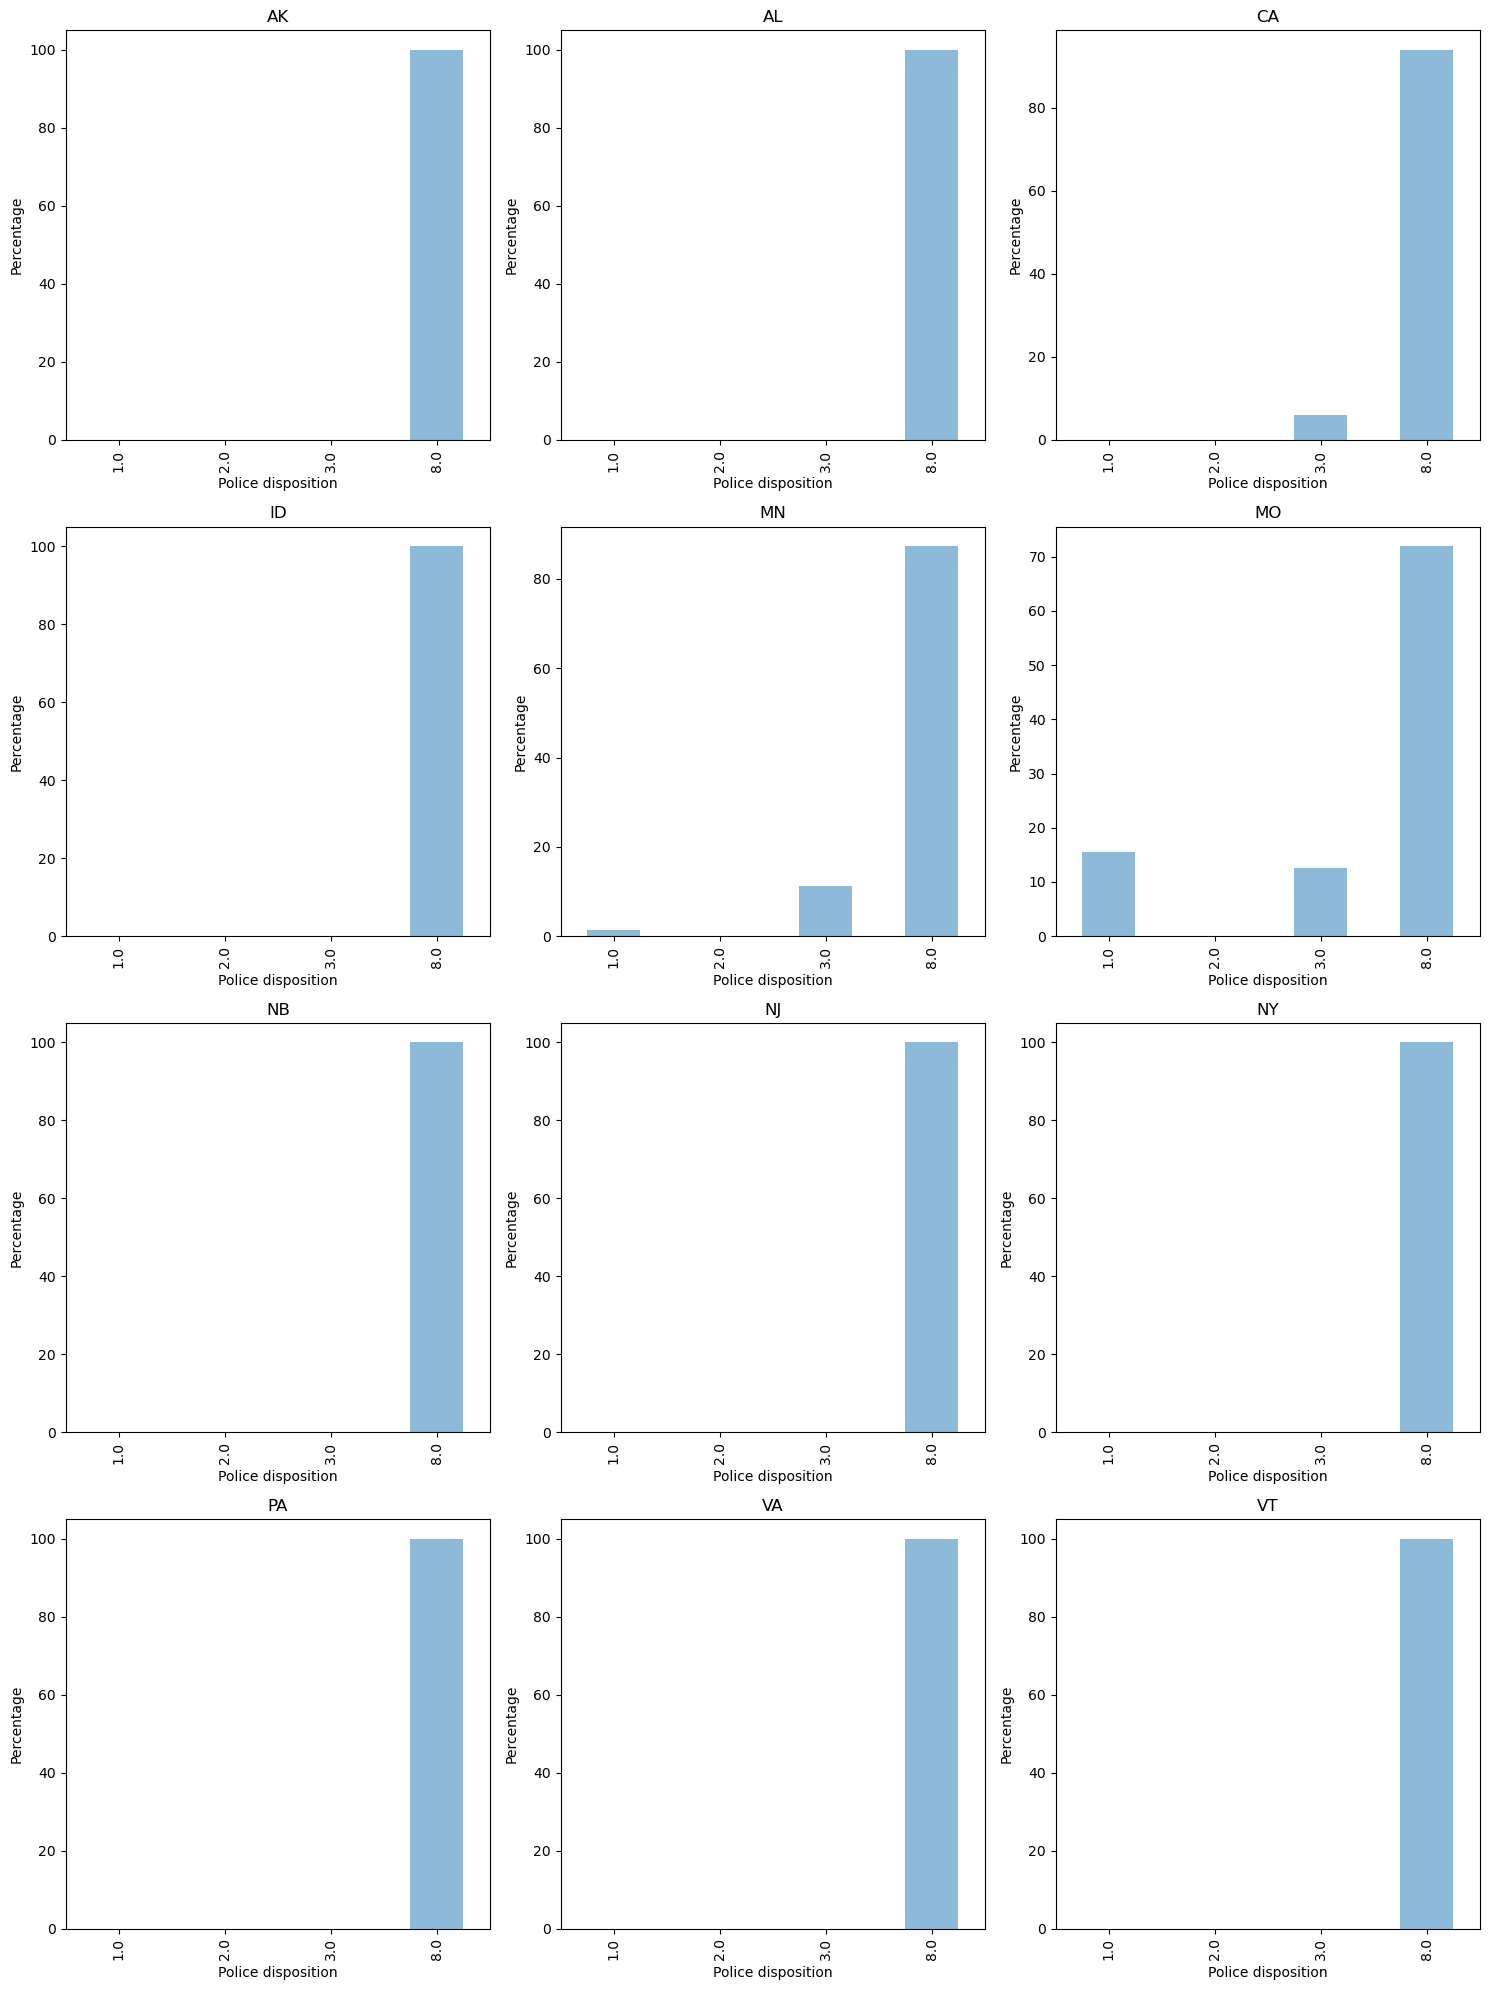

In [7]:
data_copy['V17'] = pd.Categorical(data_copy['V17'])

states = data_copy['V7'].unique()

num_cols = 3
num_rows = len(states) // num_cols + (len(states) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, state in enumerate(states):
    row = i // num_cols
    col = i % num_cols
    
    state_data = data_copy[data_copy['V7'] == state]
    count_by_value = state_data.groupby('V17').size()
    percent_by_value = count_by_value / count_by_value.sum() * 100
    
    ax = axes[row, col] if num_rows > 1 else axes[col]
    percent_by_value.plot(kind='bar', alpha=0.5, ax=ax)
    
    ax.set_title(f"{state}")
    ax.set_xlabel('Police disposition')
    ax.set_ylabel('Percentage')
    
    plt.tight_layout()

plt.show()